In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [185]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum05/data/stunting_wasting_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [187]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [188]:
df.duplicated().sum()

np.int64(7308)

In [189]:
df = df.drop_duplicates()

In [190]:
df.duplicated().sum()

np.int64(0)

In [191]:
df = df.rename(columns={
    'Jenis Kelamin':'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_cm',
    'Berat Badan (kg)' : 'berat_kg',
    'Stunting' : 'stunting',
    'Wasting' : 'wasting'
})

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


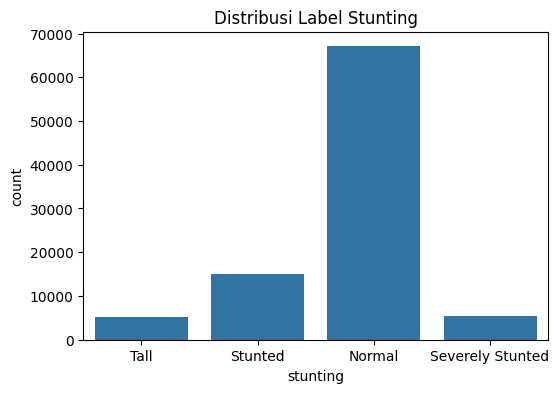

In [193]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi Label Stunting')
plt.show()

In [194]:
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) #urutan kelas
df['stunting'] = stunting_cat.cat.codes #mengubah kelas menjadi angka

#fitur kategorikal lain
for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


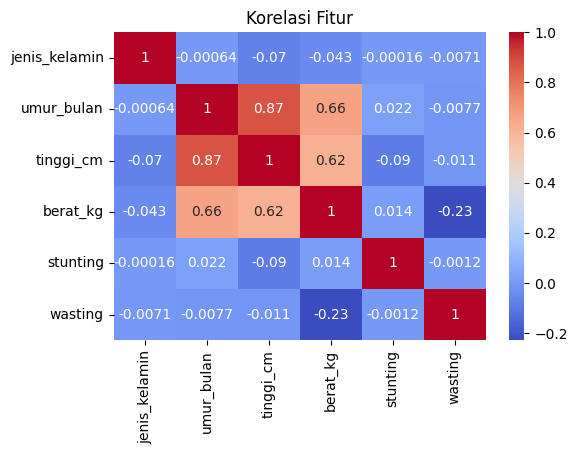

In [195]:
#Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [196]:
#Memilih Fitur dan Target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'jenis_kelamin', 'wasting']
X = df[feature_cols]
y = df['stunting']

In [197]:
#Membagi Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(74153, 18539)

In [198]:
#Membangun Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [199]:
#EVALUASI MODEL
y_pred = dt.predict(X_test)


print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=stunting_classes))

Akurasi: 77.68 %

Confusion Matrix:
 [[12903     0   481    27]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  934     0     0   119]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.82      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



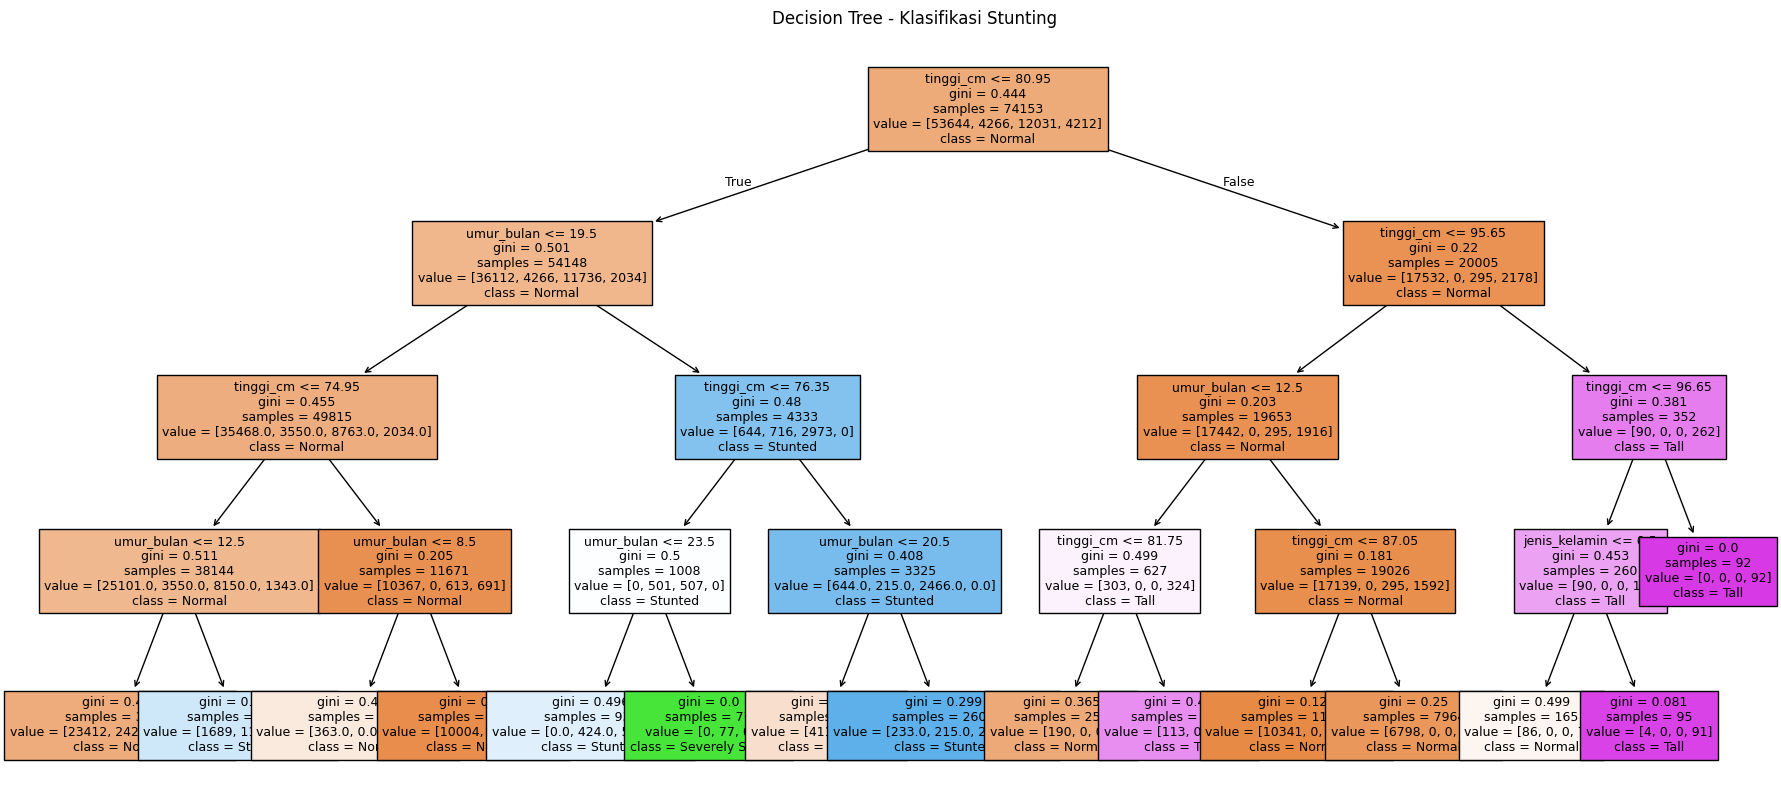

In [200]:
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    filled=True,
    feature_names=feature_cols,
    class_names=stunting_classes,
    fontsize=9)
plt.title('Decision Tree - Klasifikasi Stunting')
plt.show()

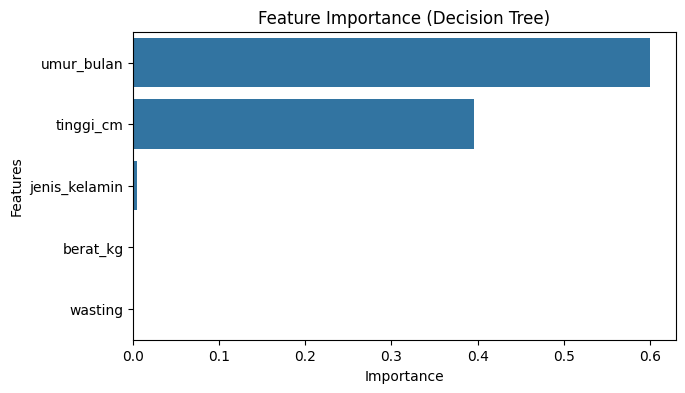

In [201]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [202]:
# HYPERPARAMETER TUNING
scores = {}
for d in range(2,nine :=9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict (X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100,2), "%")


Best max_depth: 8 | Acc: 85.72 %


**PRAKTIKUM MANDIRI**

In [203]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [204]:
from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum05/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [205]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [207]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [208]:
df.duplicated().sum()

np.int64(0)

In [209]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [210]:
print("Mapping species:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df.head()

Mapping species: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [211]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])

Jumlah data training: 120
Jumlah data testing : 30


In [213]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [214]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [215]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Decision Tree: {accuracy:.2f}")

Akurasi Model Decision Tree: 0.93


In [216]:
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



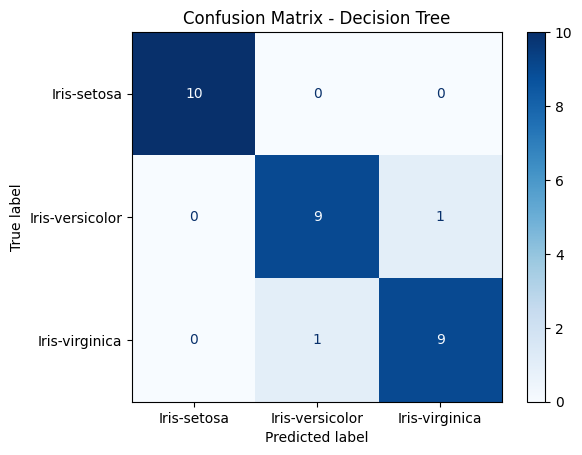

In [217]:
# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=encoder.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [218]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
          Feature  Importance
2  PetalLengthCm    0.664888
3   PetalWidthCm    0.303565
1   SepalWidthCm    0.025000
0  SepalLengthCm    0.006546


/tmp/ipython-input-595255395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


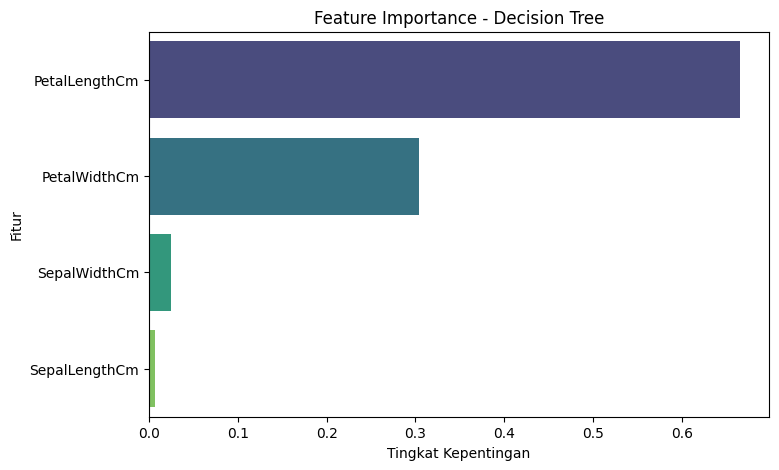

In [219]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.show()

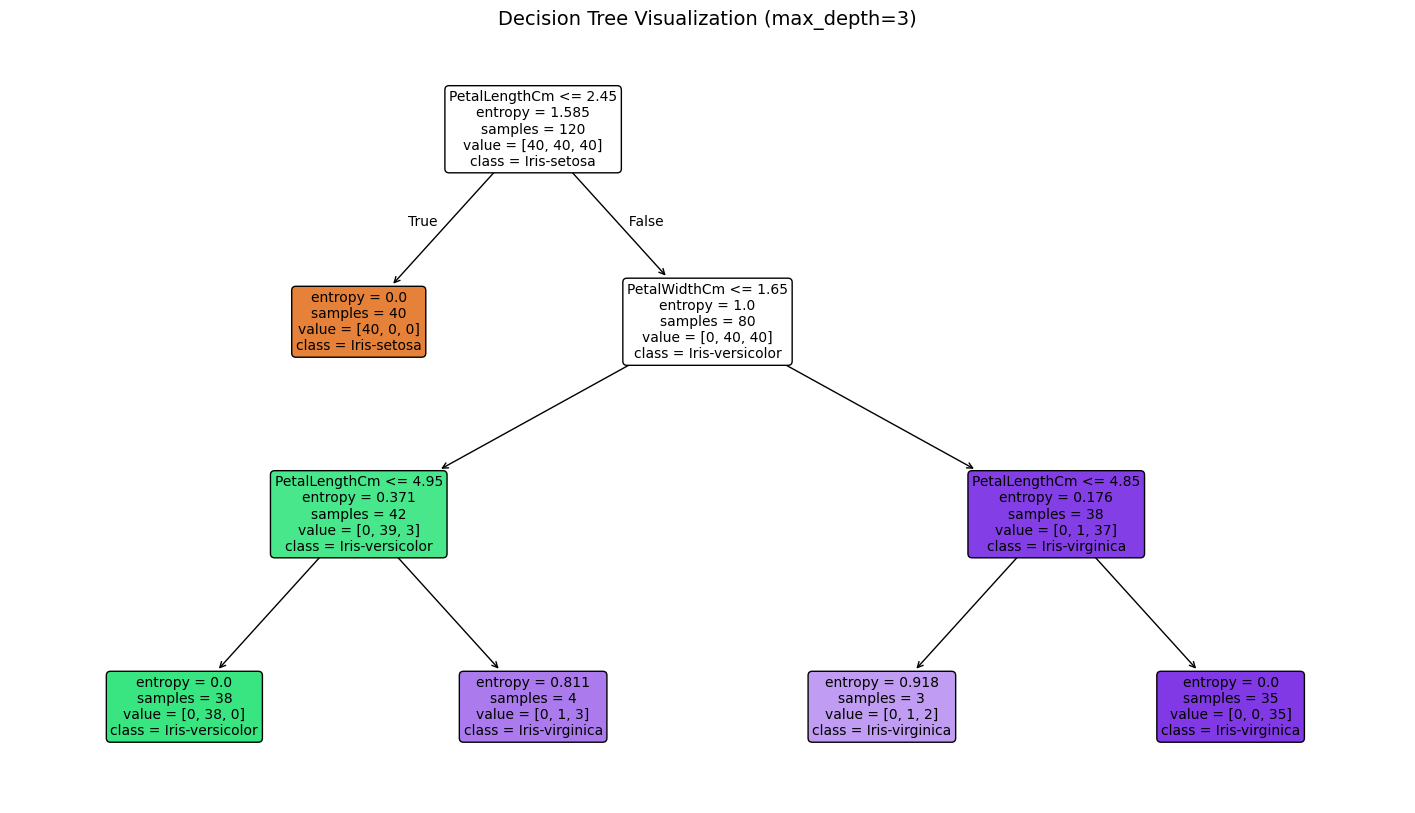

In [225]:

best_model = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

plt.figure(figsize=(18,10))  # ukuran besar agar struktur pohon terlihat jelas
plot_tree(
    best_model,                        # model yang sudah dituning / dilatih
    feature_names=X.columns,           # nama kolom fitur
    class_names=iris_target_names,     # label kelas asli (bukan angka) - using the correct string names
    filled=True,                       # warna otomatis sesuai kelas
    rounded=True,                      # bentuk kotak sudut membulat
    fontsize=10                        # ukuran teks
)
plt.title(f"Decision Tree Visualization (max_depth={best_model.get_params()['max_depth']})", fontsize=14)
plt.show()

In [220]:
sample = X_test.iloc[0]
true_label = y_test.iloc[0]
predicted_label = model.predict([sample])[0]
print("Data Sample:", sample.to_dict())
print("Prediksi Model :", encoder.inverse_transform([predicted_label])[0])
print("Label Sebenarnya:", encoder.inverse_transform([true_label])[0])

Data Sample: {'SepalLengthCm': 4.4, 'SepalWidthCm': 3.0, 'PetalLengthCm': 1.3, 'PetalWidthCm': 0.2}
Prediksi Model : Iris-setosa
Label Sebenarnya: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [221]:
# Coba berbagai nilai max_depth dan hitung akurasinya
scores = {}

# Loop untuk mencoba berbagai kedalaman pohon
for depth in range(1, 11):  # dari 1 sampai 10
    model_depth = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    model_depth.fit(X_train, y_train)
    y_pred_depth = model_depth.predict(X_test)
    acc = accuracy_score(y_test, y_pred_depth)
    scores[depth] = acc

# Tampilkan hasil per depth
print("Akurasi berdasarkan max_depth:")
for d, acc in scores.items():
    print(f"max_depth = {d} --> akurasi = {acc:.3f}")

# Cari nilai depth terbaik
best_depth = max(scores, key=scores.get)
best_accuracy = scores[best_depth]
print(f"\nDepth terbaik adalah {best_depth} dengan akurasi {best_accuracy:.3f}")


Akurasi berdasarkan max_depth:
max_depth = 1 --> akurasi = 0.667
max_depth = 2 --> akurasi = 0.933
max_depth = 3 --> akurasi = 0.967
max_depth = 4 --> akurasi = 0.933
max_depth = 5 --> akurasi = 0.933
max_depth = 6 --> akurasi = 0.933
max_depth = 7 --> akurasi = 0.933
max_depth = 8 --> akurasi = 0.933
max_depth = 9 --> akurasi = 0.933
max_depth = 10 --> akurasi = 0.933

Depth terbaik adalah 3 dengan akurasi 0.967
